## Lab 2

Написать функцию реализующую сверточный слой через im2col. Сделать проверку результата. 


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def im2col(image, kernel, stride=1, pad=0):
   
    rows, cols = image.shape
    filter_h = cols - kernel[1] + 1
    filter_w = rows - kernel[0] + 1
    img_array = np.zeros((filter_h * filter_w, kernel[1] * kernel[0])) # output array
    
    row = 0
    for i in range(0, filter_h):
        for j in range(0, filter_w):
            window = np.ravel(image[i : i + kernel[0], j : j + kernel[1]])
            img_array[row, :] = window
            row += 1

    return img_array

In [3]:
def img_convolve(image, filter_kernel):
    
    height, width = image.shape[0], image.shape[1]
    k_size = filter_kernel.shape[0]
    pad_size = k_size // 2
    image_tmp = np.pad(image, pad_size, mode="edge") # pads with the edge values of array.
    image_array = im2col(image_tmp, (k_size, k_size)) # turn the k_size*k_size pixels into a row
    kernel_array = np.ravel(filter_kernel) # turn the kernel into shape(k*k, 1)
    dist = np.dot(image_array, kernel_array).reshape(height, width) # reshape and get the dst image
    
    return dist

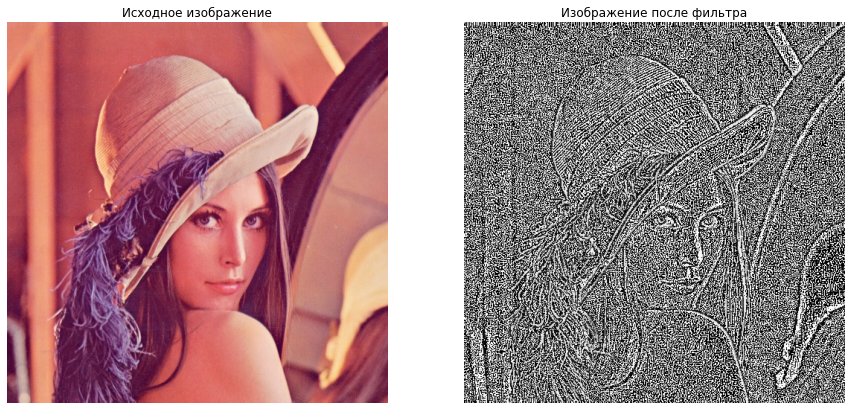

In [4]:
if __name__ == "__main__":
    img = cv2.imread(r"D:/Data\lena.jpg")
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lap_operator = np.array([[0.25, 0.5, 0.25], [0.5, -3, 0.5], [0.25, 0.5, 0.25]]) # Laplace operator (nine-point stencil)
    res = img_convolve(gray, lap_operator).astype(np.uint8)
    res_img1 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    
    f, ax = plt.subplots(1, 2)
    f.set_figheight(15)
    f.set_figwidth(15)

    ax[0].imshow(img1)
    ax[0].axis('off')
    ax[0].set_title("Исходное изображение")

    ax[1].imshow(res_img1)
    ax[1].axis('off')
    ax[1].set_title("Изображение после фильтра")